In [177]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [223]:
nx = 100
nt = 200
dt = 0.1
u = np.zeros((nx,nt))
v = np.zeros((nx,nt))

u0 = np.random.normal(0,1,size=(nx,)) #np.sin(np.arange(nx))
v0 = np.random.normal(0,1,size=(nx,))

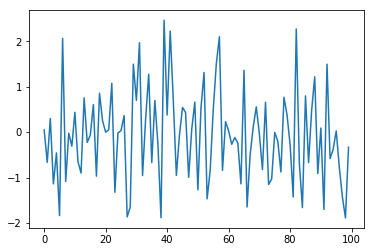

In [224]:
plt.plot(u0)

In [225]:
L = np.eye(nx, k=1) + np.eye(nx, k=-1) - np.eye(nx)*2
#L[0,0]=-1
#L[-1,-1]=-1

In [226]:
print L

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


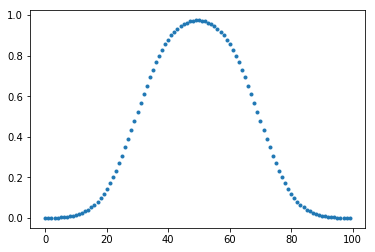

In [231]:
step = np.zeros((nx,))
step[30:70]=1
for i in range(400):
    step = step+0.1*np.dot(L,step)
plt.plot(step, '.')

In [183]:
def grayscott(u, v, L):
    f = 0.0460
    k = 0.0694
    r_u = 2e-5
    r_v = 1e-5
    dx = 1.0/146
    dx2 = dx*dx
    du = r_u*np.dot(L,u)/dx2 - u*v*v + f*(1-u)
    dv = r_v*np.dot(L,v)/dx2 + u*v*v - (f+k)*v
    return du,dv

In [184]:
u[:,0] = u0
v[:,0] = v0
for t in range(nt-1):
    dudt,dvdt = grayscott(u[:,t],v[:,t],L)
    u[:,t+1] = u[:,t] + dt*dudt
    v[:,t+1] = v[:,t] + dt*dudt

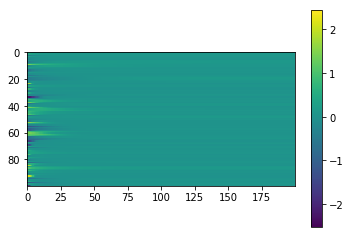

In [185]:
plt.imshow(u)
plt.colorbar()

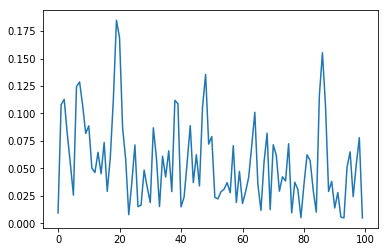

In [186]:
plt.plot(u[:,-1])

In [187]:
from numpy.linalg import eig
W,V = eig(L)
print L

[[-1.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -1.]]


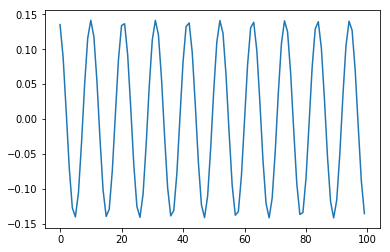

In [188]:
order = np.argsort(-W)
VV = V[:,order]
plt.plot(VV[:,19])